# Problem 1: Advanced Matplotlib

Below is a collection of exercises that will get you familiar with how to Google the answers to all of your Matplotlib woes!!

In [1]:
# the following code guarantees you'll properly reload any modules that you custom-defined in your environment.
# you don't need to understand it.
# just run this once at the beginning.
# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
import os
import sys
import numpy as np
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from mal_util import *
mal_fpath = os.path.join('csvs', 'myAnimeListDataset [07-05-2018].csv')
anime_headers, anime_studios, anime_sources, anime_dict = load_mal(mal_fpath)
anime_arr, anime_np_lookup = anime_array(anime_dict,  anime_studios, anime_sources) # convert into numpy array

print(anime_headers) # things
print('studios:', len(anime_studios), anime_studios[:10])
print(anime_sources)
print('example entry for Houseki no Kuni', anime_dict['Houseki no Kuni']) # ditionary format
np.set_printoptions(suppress=True) # remove scientific notation view
print(anime_np_lookup[0], anime_arr[0,:]) # np array format

animeID,name,premiered,genre,type,episodes,producer,licensor,studio,source,scored,scoredBy,members

['Anime ID', 'Season', 'Episodes', 'Studio', 'Source', 'Score', '# Ratings', '# Favorites']
studios: 301 ['10Gauge', '33 Collective', '3xCube', '8bit', 'A-1 Pictures', 'A-Real', 'A.C.G.T.', 'ACC Production', 'AIC', 'AIC A.S.T.A.']
['4-koma manga', 'Book', 'Card game', 'Digital manga', 'Game', 'Light novel', 'Manga', 'Music', 'Novel', 'Original', 'Other', 'Picture book', 'Radio', 'Unknown', 'Visual novel', 'Web manga']
example entry for Houseki no Kuni [35557, 2017, 3, 12, 'Orange', '', 'Manga', 8.48, 51444, 127924]
Cowboy Bebop [     1.     1998.        1.       26.      248.       -1.        9.
      8.81 363889.   704490.  ]


## Exercise 1: Dual axes with subplots

Recall the cheese file we used back in Week 2, which reported per capita consumption of cheese in the US versus golf course revenue and civil engineering doctorates awarded. It's saved in this folder under ```05_matplotlib_advanced/csvs/cheese_everything.csv```.

Plot the data on dual axes and subplots to produce the example figure below:


!['images/01_ex01_soln.png'](images/01_ex01_soln.png)

**Hints**:
* Go back to Week 2 to remind yourself how to read in CSV files. Remember to call an extra ```f.readline()``` to get rid of headers before calling ```csv.reader(f)```.
* It's probably best to create a single list of lists called ```tups``` from the file with four elements: the year, the cheese amount, ```<1 if it's a 'golf' or 0 if it's a 'civil'>```, and the corresponding amount. Then once you have this list of lists, convert it to an array with np.array(tups).
* After your ```plt.subplot()``` call, you will have an ```axs``` array of two axis objects. For each of these axis objects, you will need to call ```ax.twinx()``` for each subplot's axis.
* The line ```ax_golf, ax_civil = axs``` will define two separate variables, one for ecah subplot's axis.
* The secondary axis ylabel might overlap if you just plot it directly. I customized it with ```ax_civil_civil.set_ylabel('Civil engineering doctorates awarded', color='b', rotation=-90, va='bottom')```, where ```ax_civil_civil``` was my secondary axis for ```ax_civil```.

Save your plot image as ```05_matplotlib_advanced/images/01_ex01.png```.

[('2000', '29.8', True, '16692'), ('2001', '30.1', True, '16862'), ('2002', '30.5', True, '17533'), ('2003', '30.6', True, '17291'), ('2004', '31.3', True, '18469'), ('2005', '31.7', True, '19356'), ('2006', '32.6', True, '20523'), ('2007', '33.1', True, '21195'), ('2008', '32.7', True, '21044'), ('2009', '32.8', True, '20326'), ('2000', '29.8', False, '480'), ('2001', '30.1', False, '501'), ('2002', '30.5', False, '540'), ('2003', '30.6', False, '552'), ('2004', '31.3', False, '547'), ('2005', '31.7', False, '622'), ('2006', '32.6', False, '655'), ('2007', '33.1', False, '701'), ('2008', '32.7', False, '712'), ('2009', '32.8', False, '708')]


C:\MyPrograms\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
C:\MyPrograms\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


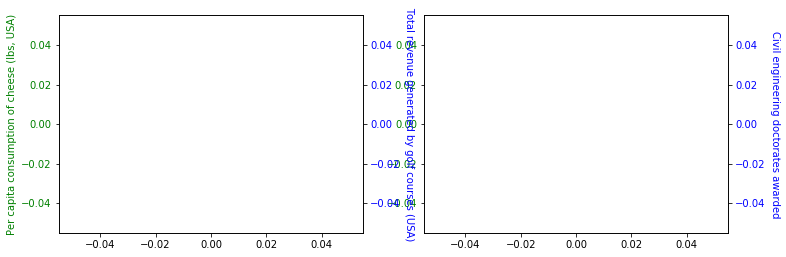

In [23]:
tups = []
YEAR, CHEESE, GOLF_OR_CIVIL, AMOUNT = range(4)

with open(os.path.join('csvs', 'cheese_everything.csv'), 'r') as f:
    # your code here to read in the csv file
    f.readline()
    line_count = csv.reader(f)
    for i in line_count:
        year, cheese_amount, golf_or_civil, amount = i
        tups.append((year, cheese_amount, bool(golf_or_civil == 'golf'), amount))
    print(tups)

arr = np.array(tups) # creates the numpy array
fig, axs = plt.subplots(1, 2, figsize=(12,4))


# your code here to plot all the things
ax_golf, ax_civil = axs

is_it_golf = arr[:,GOLF_OR_CIVIL] == 1
ax_golf.plot(arr[is_it_golf,YEAR], arr[is_it_golf,CHEESE], 'o--', c='g', alpha=0.8)
ax_golf_golf = ax_golf.twinx()
ax_golf_golf.plot(arr[is_it_golf,YEAR], arr[is_it_golf,AMOUNT], '^-', c='b', alpha=0.8)
ax_golf_golf.set_ylabel('Total revenue generated by golf courses (USA)', color='b', rotation=-90, va='bottom')
ax_golf.tick_params(axis='y', labelcolor='g')
ax_golf_golf.tick_params(axis='y', labelcolor='b')

ax_golf.set_ylabel('Per capita consumption of cheese (lbs, USA)', color='g')

is_it_civil = arr[:,GOLF_OR_CIVIL] == 0
ax_civil.plot(arr[is_it_civil,YEAR], arr[is_it_civil,CHEESE], 'o--', c='g', alpha=0.8)
ax_civil_civil = ax_civil.twinx()
ax_civil_civil.plot(arr[is_it_civil,YEAR], arr[is_it_civil,AMOUNT], '^-', c='b', alpha=0.8)
ax_civil_civil.set_ylabel('Civil engineering doctorates awarded', color='b', rotation=-90, va='bottom')
ax_civil_civil.tick_params(axis='y', labelcolor='b')
ax_civil.tick_params(axis='y', labelcolor='g')
fig.savefig(os.path.join('images', '01_ex01_soln.png'))

## Exercise 2: Studios over time

Plot the average rating of a studio over years as a line plot, with circular markers, where the marker size corresponds to the number of anime produced by that studio for that year.


!['images/01_ex02_soln.png'](images/01_ex02_soln.png)

**Hints**:
* You can check the valid studios by calling ```print(select_studios)```.
* You will need to find the index of the studio. You can do this with ```studio_ind = anime_studios.index(studios)```, where ```anime_studios``` is the list of studio names. Then this ```studio_ind``` will be a valid entry in ```anime_arr[:,STUDIO]```.
* I did this using a double for loop:

        for studio, c in zip(select_studios, select_colors):
            # set up things
            for year in valid_years:
                valid_scores = anime_arr[boolean_indexing array, SCORE]
                # more things to compute average scores over valid scores
            ax.plot(year_arr, average_scores, marker='o', s=size_based_on_number_of_anime)
        
* Recall that ```thing1, thing2 = zip(list1, list2)``` sets ```thing``` and ```thing2``` to the nth element in ```list``` and ```list2```, respectively.       
* You can incorporate two pieces of information into your boolean indexing with ```np.logical_and(<bool arg1>, <bool arg2>```.
* ```ax.legend(loc='lower right')``` sets the legend to the lower right.
* Set the valid xticks to every other even year. For example, ```ax.set_xticks(valid_years[::2])```.

Save your plot image as 05_matplotlib_advanced/images/01_ex02.png.

In [ ]:
select_studios = [] # fill this in
select_colors = [] # fill this in with colors you decide. should be same length as studio list

for studio, c in zip(select_studios, select_colors):
    # score processing stuff here
    pass

fig = plt.figure()
ax = plt.gca()
# plotting here


## Exercise 3: Average rating per season of studios

We did a scatter plot of ratings per season for select studios during lecture, but it might make more sense to look at aggregate statistics.

Show the average rating of a studio by season during the years 2000 to 2017 on a grid. An example is below.
!['images/01_ex03_soln.png'](images/01_ex03_soln.png)

**Hints:**
* Check out this link: https://stackoverflow.com/questions/5821125/how-to-plot-confusion-matrix-with-string-axis-rather-than-integer-in-python
* To set figure size, call ```plt.figure(figsize=(w,h))```, where ```w,h``` are in inches.
* I used ```plt.get_cmap('YlOrRd')``` as my colormap. A list of colormaps is here: [Matplotlib colormaps reference](https://matplotlib.org/examples/color/colormaps_reference.html)
* Colormaps automatically normalize by the range of input.
* To change the color of the text, I added an argument ```color=color``` to the ```ax.annotate()``` function call. I decided the color based on whether it was greater than the average rating (in which case I set it to white), or less than or equal to (in which case it was black).
* The season strings are located in ```SEASON_STRS```.
* Make sure you re-adjust your layout at the end with ```fig.tight_layout()``` otherwise when you save the image, you might cut off the labels.
* I called ```fig.colorbar(res, ax=ax)``` to put the colorbar legend once I was done with showing the image.

**Note that this exercise will take significantly longer than the first two exercises.**

Save your plot image as ```05_matplotlib_advanced/images/01_ex03.png.```

In [ ]:
select_studios = [] # fill this in

studio_arr = anime_arr[:,STUDIO]
valid_years = np.arange(2000, 2018)
bool_valid_years = np.array([year in valid_years for year in anime_arr[:,YEAR]])
seasons = range(4)

for studio in select_studios:
    ## your code here
    pass

# imshow and plot code here
fig = plt.figure()
ax = plt.gca()